In [18]:
''' 

Submitter : JESOON KANG, 20170937
Date : 2019. 10. 3


    Assignment 2. 

- Binary classification based on logistic regression -


'''
import matplotlib.pyplot as plt
import math
import numpy as np
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os



In [19]:

#### Section 1. #### This Section is bringed Data_import_ex.py file.

# Image Data import & resize

transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

#train_data_path = 'relative path of training data set'
train_data_path = './data/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = './data/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

#### Section 1 END ####





In [20]:
#### Section 2 START ####
# This Part includes Sigmoid, Hypothesis, Loss, Predict Functions

# sigmoid Function.
def sigmoid(z) :
    return 1 / (1 + math.e ** (-z))

In [21]:
# h(x) Function. hypothesis Func.
def hypothesis(weight,X) :
    theta = np.array(weight)
    z = np.dot(X,theta)
    h = sigmoid(z)
    return h

In [22]:
# Loss Function
def lossFunction(h,y) :
    # if i = 1, it occurs ZeroDivisionError ,
    # So, adjust value to 0.995
    for i in h :
        if i == 1 :
            i = 0.995
    try : 
        ret = (-y * np.log(h) - (1-y) * np.log(1-h)).mean()
    except ZeroDivisionError :
        print("Error")
    finally :
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

In [23]:
# predict Function. if h(x) returns >=0.5, set to 1. other cases, set to 0.
def predict(h, labels) :
    mount = len(h)
    correct = 0
    
    for i in range(0,mount) :
        if h[i] >= 0.5 :
            if labels[i] == 1 :
                correct +=1
        else :
            if labels[i] == 0 :
                correct +=1
    return correct * (1/mount)

#### Section 2 END ####

In [24]:
#### Section 3 START ####
# Section 3 includes Data Pre-processing. ReDesign datasets to easy calculate

# Data reconstruct. vectorize

# Each Image file will be stored shape of a row
training_vectorized = []
training_labels = []

validation_vectorized = []
validation_labels = []


# Training data vectorizing
for i, data in enumerate(trainloader) :
    train_data = []
    inputs, labels = data

    for u in inputs :
        for col in u[0] :
            train_data += list(col)
    training_vectorized.append(train_data)
    training_labels.append([labels])

training_vectorized = np.array(training_vectorized)
training_labels = np.array(training_labels)

# Validation data vectorizing
for i, data in enumerate(valloader) :
    val_data = []
    inputs, labels = data
    for u in inputs :
        for col in u[0] :
            val_data += list(col)
    validation_vectorized.append(val_data)
    validation_labels.append([labels])
validation_vectorized = np.array(validation_vectorized)
validation_labels = np.array(validation_labels)

#### Section 3 END ####


In [25]:
#### Section 4 START ####
# This Part includes declaring variables which will be used in train & predict & result visualization


# log variables setting : to record statements
log_training_loss = []
log_validation_loss = []
log_iter = []
log_training_acc = []
log_validation_acc = []

# Initial Weight Value
weight = np.zeros((10000,1),dtype=float)

# Learning rate 
learning_rate = 0.0002

i = 0

log_training_loss.append(1)
# Training & Validation

while (True):
    i += 1
    h = hypothesis(weight,training_vectorized)
    
    gradient = np.dot(training_vectorized.T,h-training_labels) / len(training_vectorized)
    
    # adjust weight values with gradient value
    weight-= learning_rate*gradient     
    
    # get train loss value
    training_loss = lossFunction(h,training_labels)
    
    # get accuracy
    training_acc = predict(h,training_labels)
    
    h_validation = hypothesis(weight, validation_vectorized)
    validation_loss = lossFunction(h_validation, validation_labels)
    validation_acc = predict(h_validation, validation_labels)
    
    # add log data
    log_training_loss.append(training_loss)
    log_training_acc.append(training_acc)
    
    log_validation_loss.append(validation_loss)
    log_validation_acc.append(validation_acc)
    log_iter.append(i)
    
    
    # If loss value is nearly convergence, Stop training
    if ( (abs(training_loss - log_training_loss[-2]) < 0.000001) ) :
        print("loss val is convergenced")
        break
        
    # But, Too many Epoch, Stop training.
    if (i == 10000) :
        print("EPOCH reached 10000. terminate process")
        break
        
    # Monitoring States
    if (i%100 == 0) :
        print("Current num_epoch : ",i)
        print("iter : ",i, "  t_loss : ",training_loss,"  t_acc : ", training_acc,"  v_loss: ",validation_loss, "  v_acc: ", validation_acc)
    
    
print("Finished")    


Current num_epoch :  100
iter :  100   t_loss :  0.6554004343762622   t_acc :  0.5851996105160663   v_loss:  0.6332268428969261   v_acc:  0.6796875
Current num_epoch :  200
iter :  200   t_loss :  0.6291961804731352   t_acc :  0.6806231742940604   v_loss:  0.5814607205492515   v_acc:  0.8671875
Current num_epoch :  300
iter :  300   t_loss :  0.6082936628510764   t_acc :  0.7108081791626095   v_loss:  0.5409471927042627   v_acc:  0.87890625
Current num_epoch :  400
iter :  400   t_loss :  0.5911416794791897   t_acc :  0.7263875365141188   v_loss:  0.5086491117431037   v_acc:  0.88671875
Current num_epoch :  500
iter :  500   t_loss :  0.5767399673308787   t_acc :  0.7380720545277507   v_loss:  0.48245171092941885   v_acc:  0.875
Current num_epoch :  600
iter :  600   t_loss :  0.5644159074018921   t_acc :  0.747809152872444   v_loss:  0.4608690985088647   v_acc:  0.87109375
Current num_epoch :  700
iter :  700   t_loss :  0.5537001473081345   t_acc :  0.7565725413826679   v_loss:  0.44

Current num_epoch :  5600
iter :  5600   t_loss :  0.39683071340688336   t_acc :  0.8510223953261928   v_loss:  0.30589173773523015   v_acc:  0.87109375
Current num_epoch :  5700
iter :  5700   t_loss :  0.39537345841832855   t_acc :  0.8510223953261928   v_loss:  0.30583540474340865   v_acc:  0.87109375
Current num_epoch :  5800
iter :  5800   t_loss :  0.39393951693354173   t_acc :  0.8510223953261928   v_loss:  0.30579891172607593   v_acc:  0.87109375
Current num_epoch :  5900
iter :  5900   t_loss :  0.3925281591493192   t_acc :  0.8510223953261928   v_loss:  0.3057812290028702   v_acc:  0.87109375
Current num_epoch :  6000
iter :  6000   t_loss :  0.3911386896076942   t_acc :  0.8519961051606622   v_loss:  0.30578138916822123   v_acc:  0.87109375
Current num_epoch :  6100
iter :  6100   t_loss :  0.389770444985814   t_acc :  0.8529698149951315   v_loss:  0.30579848250558417   v_acc:  0.87109375
Current num_epoch :  6200
iter :  6200   t_loss :  0.3884227920677853   t_acc :  0.8529

In [26]:
log_training_loss = log_training_loss[1:]

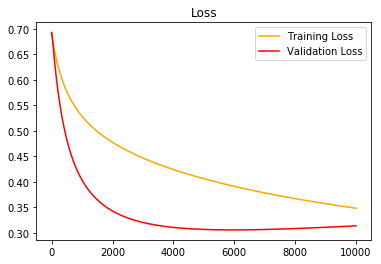

In [27]:
#### Section 5 ####
# Data Visualization


t1 = plt.plot(log_iter,log_training_loss, color='orange',label='Training Loss')
t2 = plt.plot(log_iter,log_validation_loss, color= 'red',label='Validation Loss')
plt.title("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.show()

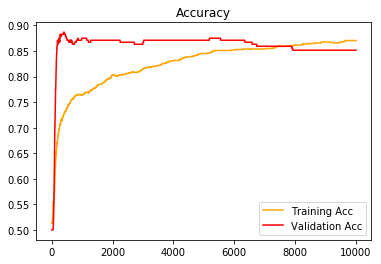

In [28]:
t1 = plt.plot(log_iter,log_training_acc, color='orange',label='Training Acc')
t2 = plt.plot(log_iter,log_validation_acc, color= 'red',label='Validation Acc')
plt.title("Accuracy")
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [29]:
# commit Point. Assignment 2 Implement is END